In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
def cv_show(name,img):
    cv2.imshow(name, img)
    cv2.waitKey()   
    cv2.destroyAllWindows()
# 读取彩色图    
img = cv2.imread('01_Picture/03_dog.jpg')
print(img.shape)
print(img.size)
cv_show('dog',img)

# 读取灰度图(默认读取)
img_gray = cv2.imread('01_Picture/03_dog.jpg', cv2.IMREAD_GRAYSCALE)
print(img_gray.shape)
print(img_gray.size)
cv_show('dog_gray',img_gray)
# 保存灰度图
cv2.imwrite('01_Picture/04_dog_gray.jpg',img_gray)

(429, 499, 3)
642213
(429, 499)
214071


True

In [4]:
# 读取hsv图
hsv = cv2.imread('01_Picture/03_dog.jpg',cv2.COLOR_BGR2HSV)
print(hsv.shape)
print(hsv.size)
cv_show('hsv',hsv)

(108, 125, 3)
40500


In [5]:
vc = cv2.VideoCapture('02_Video/00_Scenery.mp4')
if vc.isOpened():   # 检查是否打开正确
    open, frame = vc.read() # 这里的 vc.read() 相当于读取图像的第一帧
else:
    open = False
# 读取视频    
while open:
        ret,frame = vc.read()
        if frame is None:
            break
        if ret == True:
            gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            cv2.imshow('video',gray)
            if cv2.waitKey(10) & 0xFF ==27:
                 break
vc.release()
cv2.destroyAllWindows()

In [6]:
dog = img[0:200,0:200]
cv_show('dog_ROI',dog)

In [7]:
b,g,r = cv2.split(img)
cv_show('cat_b',b)
print('b.shape:',b.shape)

cv_show('cat_g',g)
print('g.shape:',g.shape)
cv_show('cat_r',r)
print('r.shape:',r.shape)
img = cv2.merge((b,g,r))
print('img.shape:',img.shape)

cur_img = img.copy()

b.shape: (429, 499)
g.shape: (429, 499)
r.shape: (429, 499)
img.shape: (429, 499, 3)


In [8]:
b,g,r = cv2.split(img)
cv_show('cat_b',b)
print('b.shape:',b.shape)

cv_show('cat_g',g)
print('g.shape:',g.shape)
cv_show('cat_r',r)
print('r.shape:',r.shape)
img = cv2.merge((b,g,r))
print('img.shape:',img.shape)

# 只保留 R
cur_img = img.copy()
cur_img[:,:,0]=0
cur_img[:,:,1]=0
cv_show('R',cur_img)
# 只保留 G
cur_img = img.copy()            
cur_img[:,:,0]=0
cur_img[:,:,2]=0
cv_show('G',cur_img)
# 只保留 B
cur_img = img.copy()
cur_img[:,:,1]=0
cur_img[:,:,2]=0
cv_show('B',cur_img)

b.shape: (429, 499)
g.shape: (429, 499)
r.shape: (429, 499)
img.shape: (429, 499, 3)


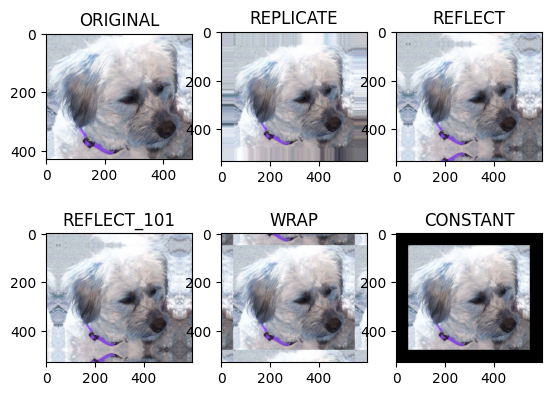

In [9]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('01_Picture/03_dog.jpg')
top_size,bottom_size,left_size,right_size =(50,50,50,50)
replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,cv2.BORDER_CONSTANT,value=0)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()

In [10]:
img_cat = cv2.imread('01_Picture/01_cat.jpg')
img_dog = cv2.imread('01_Picture/03_dog.jpg')
print(img_cat.shape)
print(img_dog.shape)

print(img_cat[:5,:,0])
print((img_cat+1)[:5,:,0])
img_dog = cv2.resize(img_dog,(img_cat.shape[1],img_cat.shape[0]))
print((img_cat+img_dog)[:5,:,0])
print((cv2.add(img_cat,img_dog))[:5,0])
res =cv2.addWeighted(img_cat,0.5,img_dog,0.5,0)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()


(414, 500, 3)
(429, 499, 3)
[[142 146 151 ... 156 155 154]
 [108 112 118 ... 155 154 153]
 [108 110 118 ... 156 155 154]
 [139 141 148 ... 156 155 154]
 [153 156 163 ... 160 159 158]]
[[143 147 152 ... 157 156 155]
 [109 113 119 ... 156 155 154]
 [109 111 119 ... 157 156 155]
 [140 142 149 ... 157 156 155]
 [154 157 164 ... 161 160 159]]
[[77 70 60 ... 99 99 97]
 [42 36 28 ... 97 96 96]
 [42 37 35 ... 94 94 93]
 [74 73 74 ... 89 87 87]
 [88 90 94 ... 88 86 85]]
[[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]]


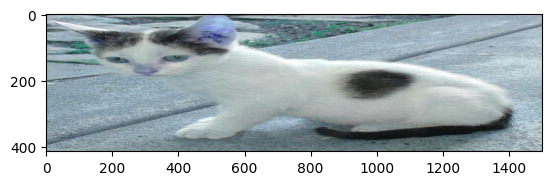

In [14]:
res1 =cv2.resize(img_cat,(0,0),fx=3,fy=1)
plt.imshow(res1)


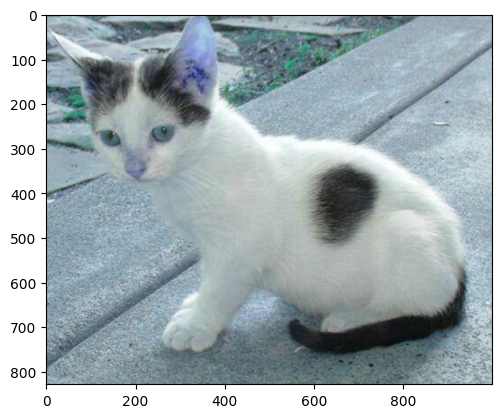

In [15]:
res2 =cv2.resize(img_cat,(0,0),fx=2,fy=2)
plt.imshow(res2)

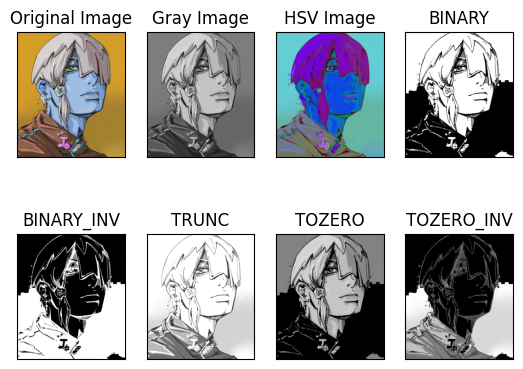

In [20]:
img = cv2.imread('01_Picture/jojo.jpg',cv2.IMREAD_COLOR)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img_gray = cv2.imread('01_Picture/jojo.jpg',cv2.IMREAD_GRAYSCALE)
ret,thresh1 =cv2.threshold(img_gray,128,255,cv2.THRESH_BINARY)
ret,thresh2 =cv2.threshold(img_gray,128,255,cv2.THRESH_BINARY_INV)
ret,thresh3 =cv2.threshold(img_gray,128,255,cv2.THRESH_TRUNC)
ret,thresh4 =cv2.threshold(img_gray,128,255,cv2.THRESH_TOZERO)
ret,thresh5 =cv2.threshold(img_gray,128,255,cv2.THRESH_TOZERO_INV)
titles =['Original Image','Gray Image','HSV Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images =[img,img_gray,img_hsv,thresh1,thresh2,thresh3,thresh4,thresh5]
for i in range(8):
    plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [23]:
img =cv2.imread('01_Picture/03_dog.jpg',cv2.IMREAD_COLOR)
blur = cv2.blur(img,(3,3))

box1 =cv2.boxFilter(img,-1,(3,3),normalize =True)

box2 =cv2.boxFilter(img,-1,(3,3),normalize =False)

gaussian =cv2.GaussianBlur(img,(5,5),1)

median =cv2.medianBlur(img,5)

res = np.hstack((img,blur,box1,box2,gaussian,median))
# res = np.vstack((img,blur,box1,box2,gaussian,median))
cv_show('res',res)


(500, 500, 3)
750000


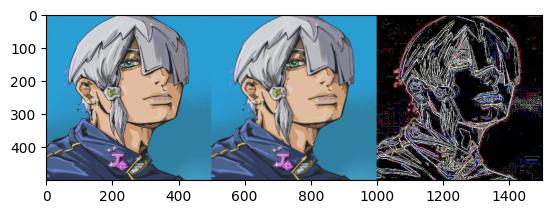

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
img =cv2.imread('01_Picture/jojo.jpg',cv2.IMREAD_COLOR)
img = cv2.resize(img,(500,500))
print(img.shape)
print(img.size)
up =cv2.pyrUp(img)
up_down =cv2.pyrDown(up)
l_1 =img -up_down
res =np.hstack((img,up_down,l_1))
cv_show(res,'res')
plt.imshow(res[:,:,::-1])

2511


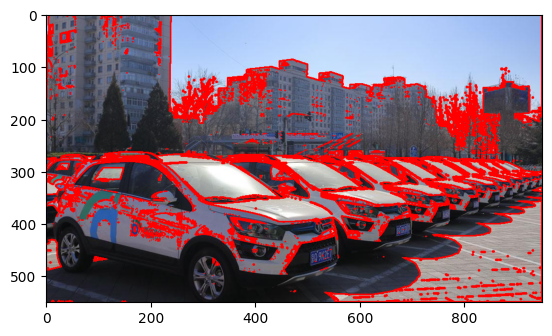

In [ ]:
img_car =cv2.imread('01_Picture/08_Car.png',cv2.IMREAD_COLOR)
img_gray = cv2.imread('01_Picture/08_Car.png',cv2.IMREAD_GRAYSCALE)
ret,thresh =cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
cv_show(thresh,'thresh')
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print(len(contours))
draw_img = img_car.copy()
res =cv2.drawContours(draw_img,contours,-1,(0,0,255),2)
cv_show(res,'res')
plt.imshow(res[:,:,::-1]) 


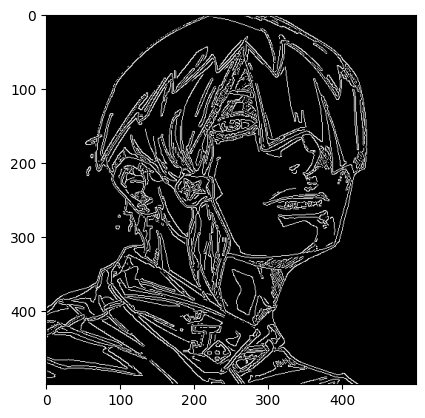

In [ ]:
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
canny = cv2.Canny(img,100,200)
cv_show(canny,'Canny')
plt.imshow(canny,cmap ='gray')


(<Axes: >, <matplotlib.image.AxesImage at 0x7748ac6deb80>)

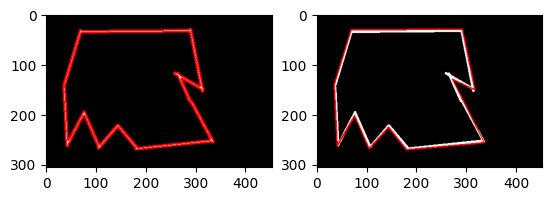

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

img =cv2.imread('01_Picture/11_contours2.png')
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh =cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
contours,hierarchy =cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

# 4.1 轮廓绘制展示
draw_img1 = img.copy()
res1 =cv2.drawContours(draw_img1,contours,-1,(0,0,255),2)
cv_show(res1,'res1')
plt.subplot(121),plt.imshow(res1[:,:,::-1])

# 4.2 轮廓近似展示
cnt = contours[0]
draw_img2 = img.copy()
epsilon =0.01*cv2.arcLength(contours[0],True)
approx =cv2.approxPolyDP(cnt,epsilon,True)
res2 =cv2.drawContours(draw_img2,[approx],-1,(0,0,255),2)
cv_show(res2,'res2')
plt.subplot(122),plt.imshow(res2[:,:,::-1])



(684, 535)
-0.22387810051441193
0.9973748922348022
(387, 673)
(351, 152)
4


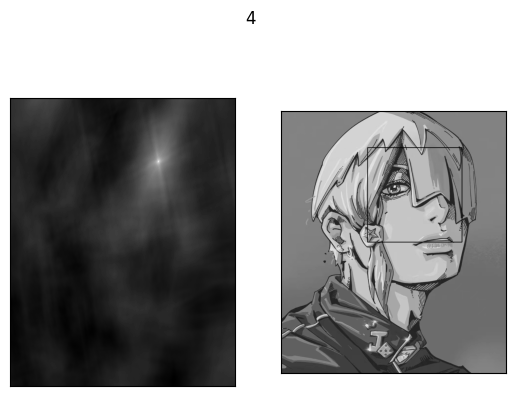

5


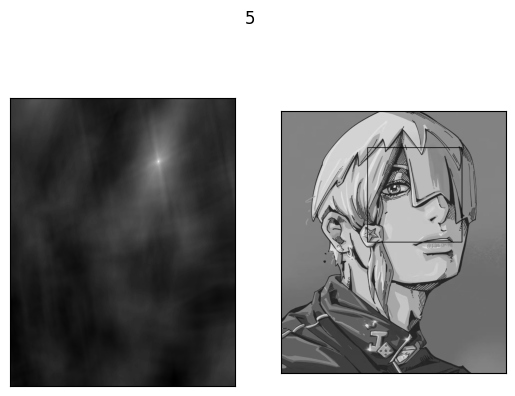

2


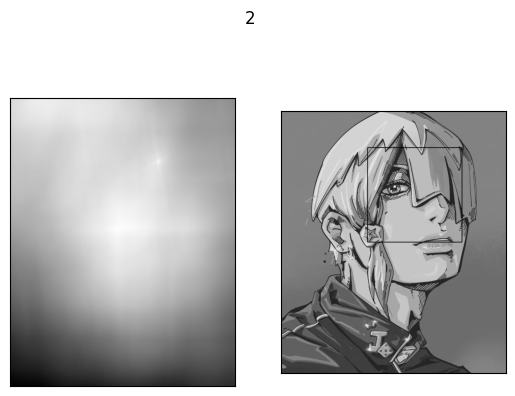

3


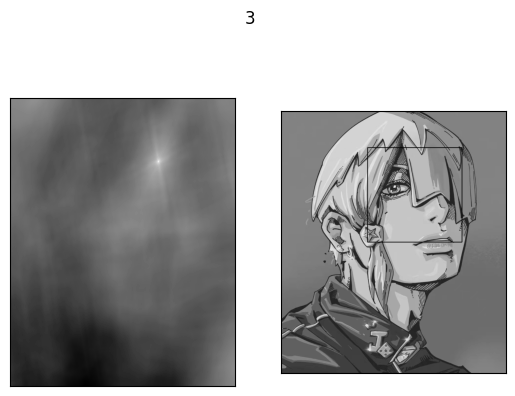

0


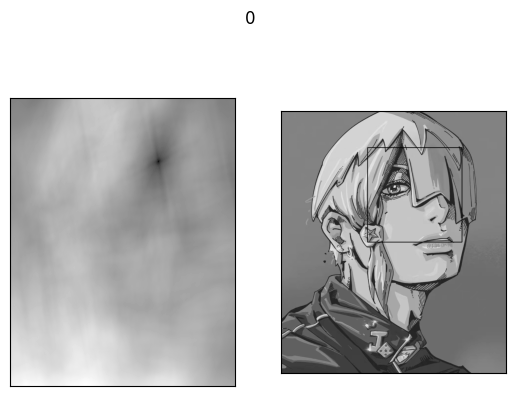

1


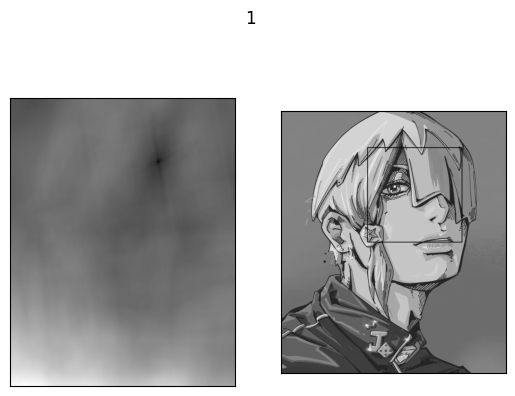

In [26]:
# 模板匹配对象
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
template = cv2.imread('01_Picture/jojo_Face.jpg',0)
img = cv2.imread('01_Picture/jojo.jpg',0)
h, w = template.shape[:2]
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
print(res.shape)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val)
print(max_val)
print(min_loc)
print(max_loc)

for method in methods:
    img_copy = img.copy()
    method = eval(method)
    print(method)
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img_copy,top_left,bottom_right,(0,255,0),2)
    plt.subplot(121),plt.imshow(res,cmap ='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_copy,cmap ='gray')
    plt.xticks([]), plt.yticks([])
    plt.suptitle(method)
    plt.show()

(977522,)


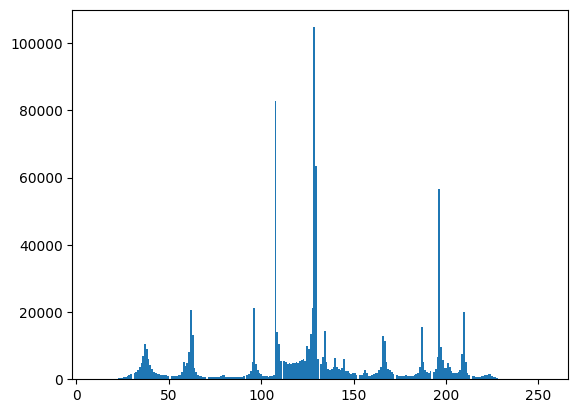

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def cv_show(img,name):
    cv2.imshow(name,img)
    cv2.waitKey()
    cv2.destroyAllWindows()
img =cv2.imread('01_Picture/jojo.jpg',0)
cv_show(img,'img')
print(img.ravel().shape)
plt.hist(img.ravel(),256)
plt.show()


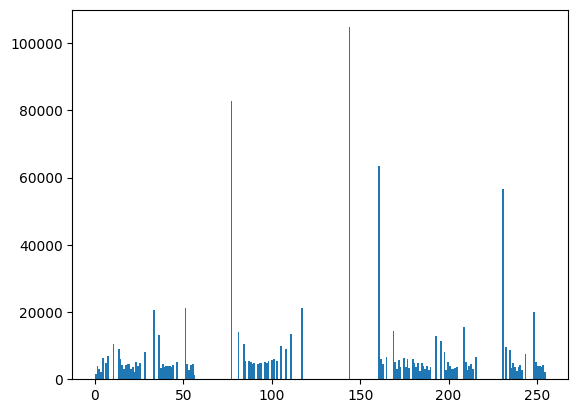

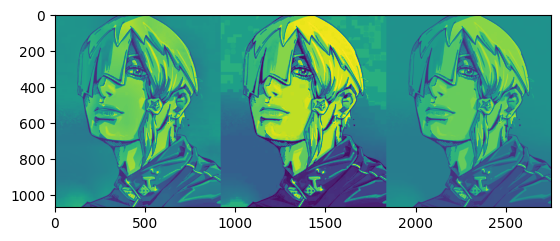

In [ ]:
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256)
plt.show()
res1 = np.hstack((img,equ))
cv_show(res1,'res1')
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8)) # 自适应均衡化方法生成出来    
res_clahe = clahe.apply(img) # 方法应用到输入图片当中
res2 = np.hstack((img,equ,res_clahe))
cv_show(res2,'res2')
plt.imshow(res2[:,::-1])

(([], []), ([], []))

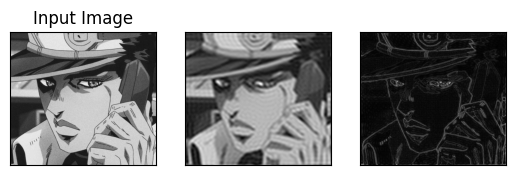

In [24]:
img = cv2.imread('01_Picture/jojo3.png',0)
img_float32 = np.float32(img) 
dft =cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
rows,cols = img.shape
crow,ccol = int(rows/2), int(cols/2)
# 低通滤波
mask_L = np.zeros((rows,cols,2),np.uint8)
mask_L[crow-30:crow+30,ccol-30:ccol+30] = 1
fshift = dft_shift * mask_L
f_ishift = np.fft.ifftshift(fshift)
img_back_L = cv2.idft(f_ishift)
img_back_L = cv2.magnitude(img_back_L[:,:,0],img_back_L[:,:,1])
mask_H = np.ones((rows,cols,2),np.uint8)
mask_H[crow-30:crow+30,ccol-30:ccol+30] = 0
fshift = dft_shift * mask_H
f_ishift = np.fft.ifftshift(fshift)     
img_back_H = cv2.idft(f_ishift)
img_back_H = cv2.magnitude(img_back_H[:,:,0],img_back_H[:,:,1])
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back_L,cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back_H,cmap = 'gray')
plt.xticks([]), plt.yticks([])